In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
#import "../computerVision/ExploreOpenCVDnn/track.py"
%matplotlib notebook

In [2]:
data = pickle.load( open('/Users/arygout/Documents/aaStuff/BenchmarkVideos/KalmanFilterTestFiles/Test14/videoDump.pkl', 'rb'))

#40:57 for 7
#16:32 for 8
lowerBound = 0
upperBound = -1

sampling = 2
meas = data['measurement'][lowerBound:upperBound][::sampling]
ts = (data['imageCaptureTimes'] - data['imageCaptureTimes'][0])[lowerBound:upperBound][::sampling]
fs = data['filterState'][lowerBound:upperBound][::sampling]
fc = data['filterCovariance'][lowerBound:upperBound][::sampling]


In [3]:
np.diff(ts)

array([0.46304202, 0.42743611, 0.39306498, 0.42928195, 0.40292406,
       0.39646697, 0.39843082, 0.42853999, 0.46003509, 0.39326692,
       0.        , 0.85680628, 0.        , 0.        , 1.65300989,
       0.43241   , 0.        , 1.67929387, 0.39859104, 1.05456901,
       0.42940497, 0.40026808, 0.45938706, 0.46307778, 0.19922423,
       0.62707877, 0.42175412, 0.23069906, 0.4023819 , 0.        ,
       1.01658988, 0.46955395, 0.19064021, 0.62961578, 0.42976522,
       0.39323497, 0.40178084, 0.39714122, 0.41629982, 0.432585  ,
       0.40005708, 0.39788294, 0.42982697, 0.42333698, 0.42778111,
       0.39439797, 0.43979907, 0.39166808, 0.        , 0.        ,
       1.25168896, 0.19290113, 0.        , 0.        , 1.6884799 ,
       0.19291186, 0.43487   , 0.        , 0.        , 1.65446615,
       0.19003177, 0.63277102, 0.39478016, 0.        , 0.81942701,
       0.40514612, 0.        , 0.        , 1.41907287, 0.18880105,
       0.        , 0.        , 1.65642786, 0.38537097, 0.43497

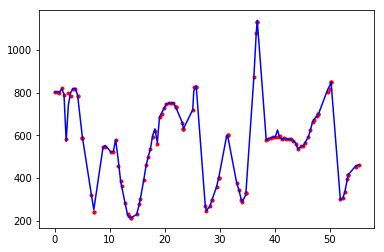

In [4]:
plt.figure()
plt.plot(ts, meas, 'r.')
plt.plot(ts, fs[:,0], 'b-')
plt.show()

In [557]:
nAhead = 1

numPoints = 5

linearFit = np.empty((meas.shape[0] - numPoints - nAhead))

for i in range(meas.shape[0] - numPoints - nAhead):
    fit = np.polyfit(ts[i:i+numPoints],meas[i:i+numPoints],1)
    linearFit[i] = np.polyval(fit, ts[i+numPoints+nAhead])

<IPython.core.display.Javascript object>


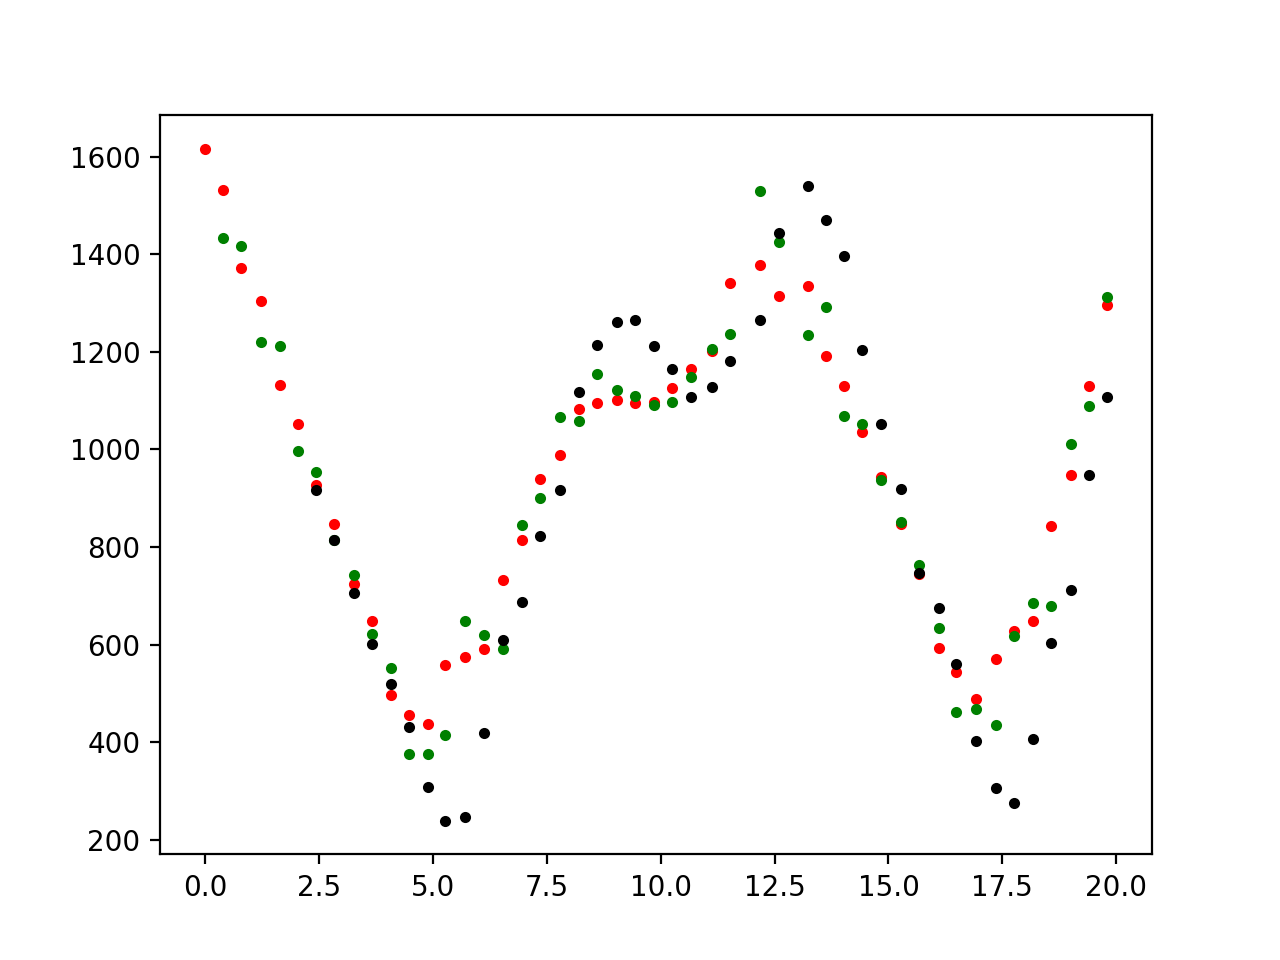

KF mean error: 56.53268616938534
linearFit mean error: 135.78585388369228


In [558]:
plt.figure()
#plt.plot(ts[1:], (fs[:-1,0] + fs[:-1,1] * np.diff(ts)),'b.')
plt.plot(ts, meas,'r.')

plt.plot(ts[nAhead:], (fs[:-nAhead,0] + fs[:-nAhead,1] * (ts[nAhead:] - ts[:-nAhead])),'g.')

plt.plot(ts[numPoints+nAhead:], linearFit, 'k.')

print("KF mean error: {}".format(np.mean(abs((fs[:-nAhead,0] + fs[:-nAhead,1] * (ts[nAhead:] - ts[:-nAhead])) - meas[nAhead:]))))

print("linearFit mean error: {}".format( np.mean(abs((linearFit - meas[numPoints+nAhead:])))))

plt.show()

In [498]:
sampling

1

In [499]:
#plt.hist(data['filterState'][:,0] - data['measurement'],100)

plt.hist(np.diff(ts),100)
plt.show()
print("numts: {}. duration: {}".format(ts.shape[0], 
                                       np.max(ts) - np.min(ts)))

numts: 16. duration: 7.557222843170166


In [500]:
plt.plot(np.diff(ts))

In [501]:
ts = data['imageCaptureTimes']

plt.plot(ts, data['filterState'][:100][:, 1], label = 'velocity pred')
plt.plot(ts[1:], np.diff(data['filterState'][:100][:, 0]), label = 'velocity finite diff')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


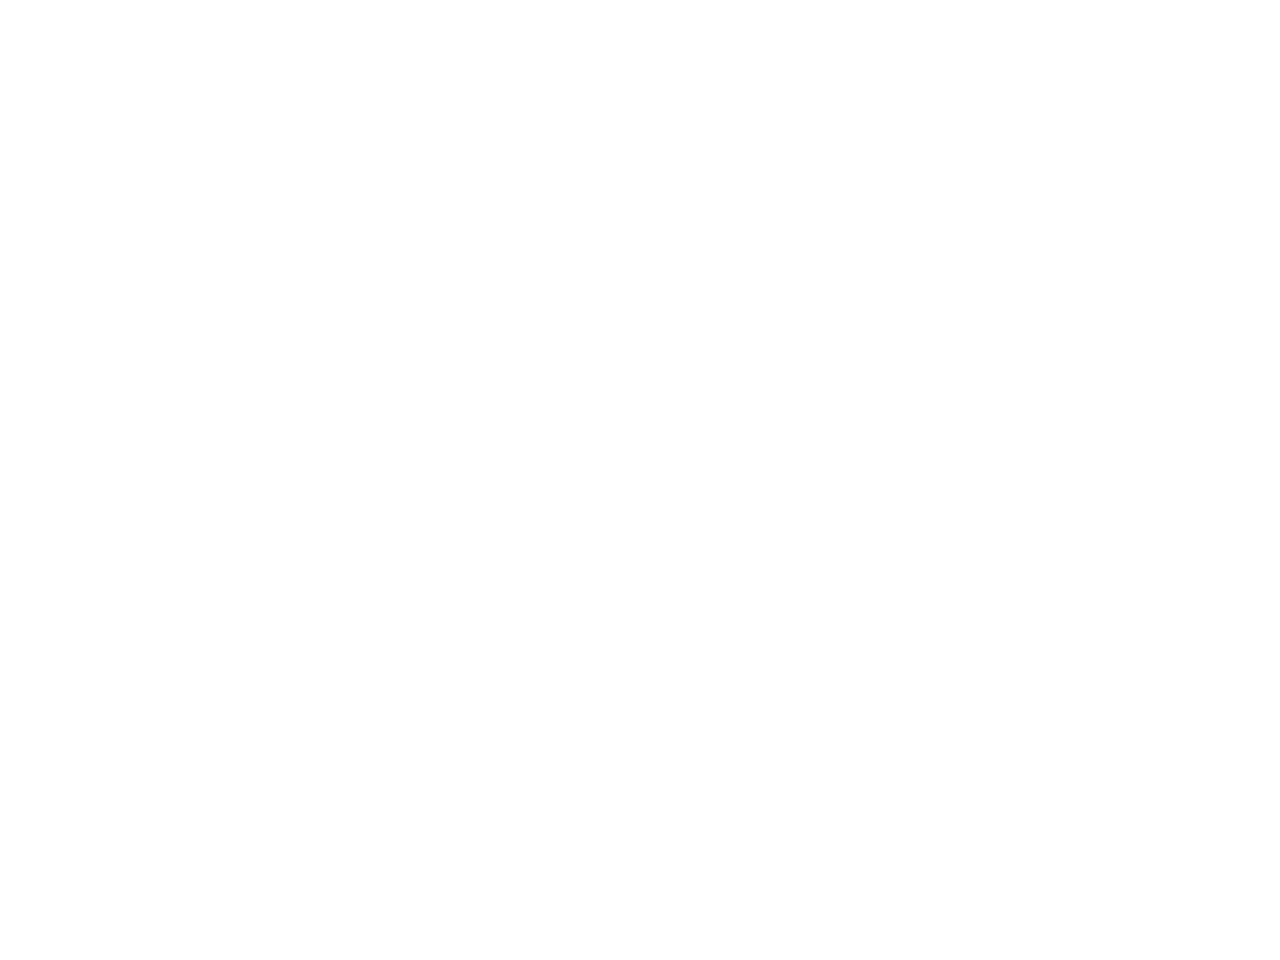

In [502]:
plt.figure()
plt.hist(np.diff(ts),100)
plt.show()

In [503]:
plt.hist(data['measurement'][nAhead:] - (data['filterState'][:-nAhead,0] + data['filterState'][:-nAhead,1] * (ts[nAhead:] - ts[:-nAhead])))


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 29.,  3.]),
 array([-754.20042445, -663.23656255, -572.27270064, -481.30883873,
        -390.34497682, -299.38111492, -208.41725301, -117.4533911 ,
         -26.48952919,   64.47433271,  155.43819462]),
 <a list of 10 Patch objects>)

In [504]:
(fs[:-1,0] + fs[:-1,1] * np.diff(ts))

ValueError: operands could not be broadcast together with shapes (15,) (35,) 